# Drug Safety in Healthcare 
**Allahdad Shujrah** 


## Introduction
A pharmaceutical company has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).


In [1]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Filter out UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)


## Data Loading and Cleaning

We see we have some null values for "White Blood Cells" and "Red Blood Cells". This is a limitation, however, we won't discard the missing rows as the variables mentioned do not have a role in our hypothesis testing. 


In [2]:
# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Get the number of rows and columns
number_of_rows, number_of_columns = drug_safety.shape

# Print the results
print(f"The DataFrame has {number_of_rows} rows and {number_of_columns} columns.")

# Check for missing values in each column
print(drug_safety.isnull().sum())

# Investigate missing values in specific columns (if needed)
# For example, to explore missing values in 'wbc':
#print(drug_safety['wbc'].isnull().sum())

drug_safety.head()


The DataFrame has 16103 rows and 8 columns.
age                   0
sex                   0
trx                   0
week                  0
wbc                6975
rbc                6976
adverse_effects       0
num_effects           0
dtype: int64


,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [3]:
# Investigate missingness by treatment group
drug_safety_grouped = drug_safety.groupby('trx')

# Apply lambda function to check missing values and sum across groups
missing_values_by_group = drug_safety_grouped[['wbc', 'rbc']].apply(
    lambda x: x.isnull().sum()
)
#print(missing_values_by_group)
print(missing_values_by_group)

# Visualize the distribution of missing values for all columns
#drug_safety.isnull().sum().plot(kind='bar')
#plt.xlabel('Variable')
#plt.ylabel('Count of Missing Values')
#plt.title('Distribution of Missing Values')
#plt.show()

#drug_safety.dropna(subset=['wbc', 'rbc'], inplace=True)

# Get the number of rows and columns
number_of_rows, number_of_columns = drug_safety.shape

# Print the results
print(f"The DataFrame has {number_of_rows} rows and {number_of_columns} columns.")

          wbc   rbc
trx                
Drug     4716  4716
Placebo  2259  2260
The DataFrame has 16103 rows and 8 columns.


## Data Visualisation 

### Descriptive stats for Age, White Blood Cells and Red Blood Cells

           age     wbc     rbc
count 16103.00 9128.00 9127.00
mean     64.12    7.34    4.67
std       8.78    2.00    0.46
min      39.00    1.80    2.10
25%      58.00    6.00    4.40
50%      65.00    7.10    4.70
75%      71.00    8.40    5.00
max      84.00   26.50    7.60


<Figure size 1200x600 with 0 Axes>

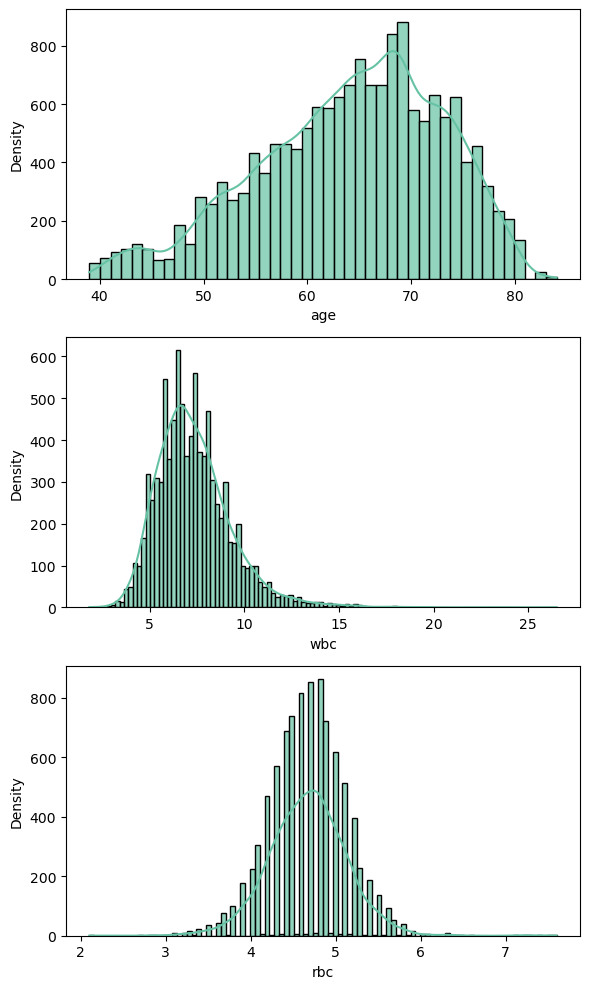

In [4]:
# Assuming the cleaned data is stored in the DataFrame "drug_safety"
# Update numerical_cols based on your data
numerical_cols = ['age', 'wbc', 'rbc']

# Get formatted description and print it
formatted_description = drug_safety[numerical_cols].describe().to_string(float_format='{:.2f}'.format)
print(formatted_description)


# Assuming the cleaned data is stored in the DataFrame "drug_safety"
# Update numerical_cols based on your data
#numerical_cols = ['age', 'week', 'wbc', 'rbc']

# Set figure size and color palette for consistency
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
sns.set_palette("Set2")  # Choose a visually appealing color palette
# Assuming the cleaned data is stored in the DataFrame "drug_safety"
# Update numerical_cols based on your data

#numerical_cols = ['age', 'week', 'rbc']  # Assuming three numerical columns

# Assuming the cleaned data is stored in the DataFrame "drug_safety"
# Update numerical_cols based on your data

#numerical_cols = ['age', 'week', 'rbc']  # Assuming three numerical columns

rows, cols = 3, 1  # Adjust rows and columns (3 rows, 1 column)
fig, axes = plt.subplots(rows, cols, figsize=(6, 10))  # Create subplots grid

# Loop through all numerical columns
for i, col in enumerate(numerical_cols):
    # Access the corresponding subplot for each column (single column)
    ax = axes[i]  # Access subplot directly by index due to single column

    sns.histplot(
        data=drug_safety,
        x=col,
        kde=True,  # Add a density curve
        linewidth=1,  # Adjust line width for better visibility
        edgecolor="black",  # Set distinct edge color
        alpha=0.7,  # Set transparency for potential data overlap visualization
        ax=ax  # Assign plot to the current subplot
    )
    ax.set_xlabel(col)  # Label the x-axis for each plot
    ax.set_ylabel("Density")  # Label the y-axis consistently

# Adjust layout and spacing for improved aesthetics
plt.tight_layout()
plt.show()

## Visualization between Treatment/Sex and Age as well as distribution of Weeks in the data


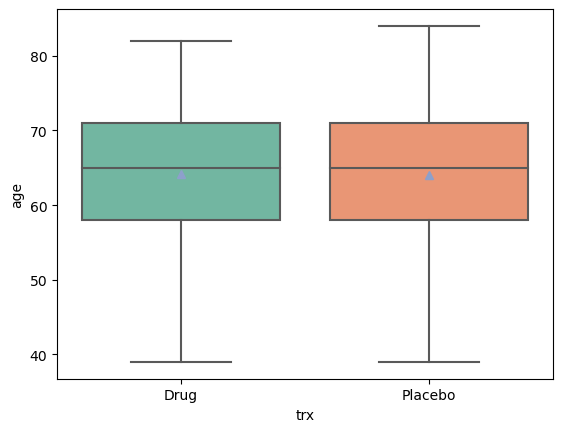

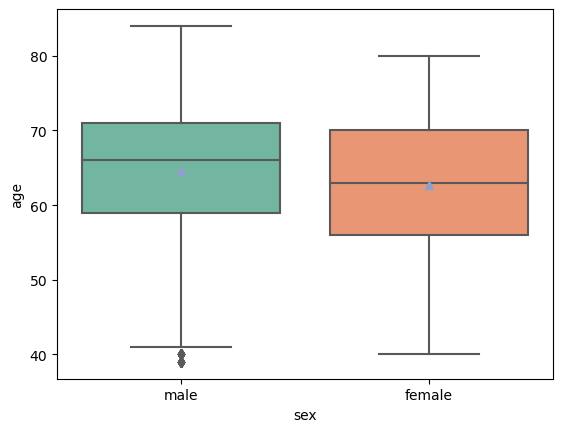

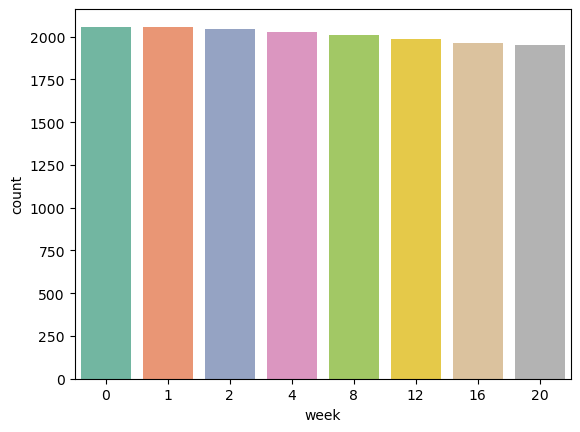

In [5]:
# Boxplots to compare groups (categorical vs. continuous)
sns.boxplot(
    x="trx",
    y="age",
    showmeans=True,  # Show mean values as points
    data=drug_safety
)
plt.show()

sns.boxplot(
    x="sex",
    y="age",
    showmeans=True,
    data=drug_safety
)
plt.show()

sns.countplot(x="week", data=drug_safety)
plt.show()

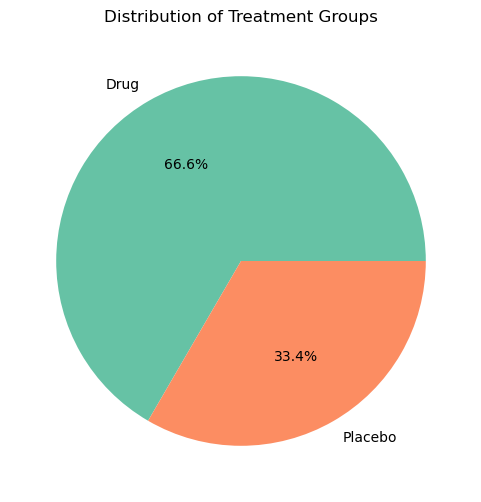

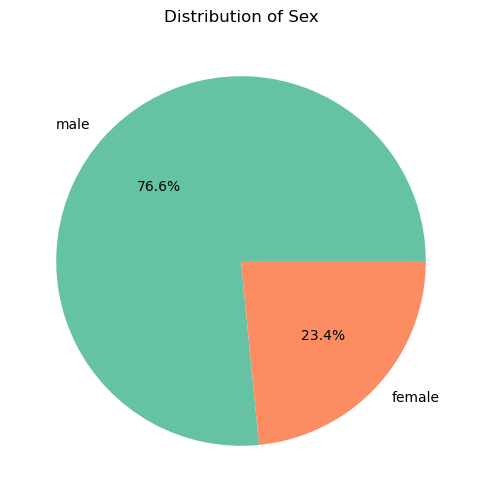

In [6]:
# Create a pie chart for trx
plt.figure(figsize=(6, 6))  # Adjust figure size as desired

# Get category counts
trx_counts = drug_safety["trx"].value_counts().sort_values(ascending=False)  # Sort by count in descending order

# Get pie chart slice labels
trx_labels = trx_counts.index.to_numpy()

# Get pie chart slice values
trx_values = trx_counts.to_numpy()

# Create pie chart
plt.pie(trx_values, labels=trx_labels, autopct="%1.1f%%")  # Display percentages with one decimal place
plt.title("Distribution of Treatment Groups")
plt.show()

# Create a pie chart for sex (similar approach)
plt.figure(figsize=(6, 6))  # Adjust figure size as desired

sex_counts = drug_safety["sex"].value_counts().sort_values(ascending=False)
sex_labels = sex_counts.index.to_numpy()
sex_values = sex_counts.to_numpy()

plt.pie(sex_values, labels=sex_labels, autopct="%1.1f%%")
plt.title("Distribution of Sex")
plt.show()


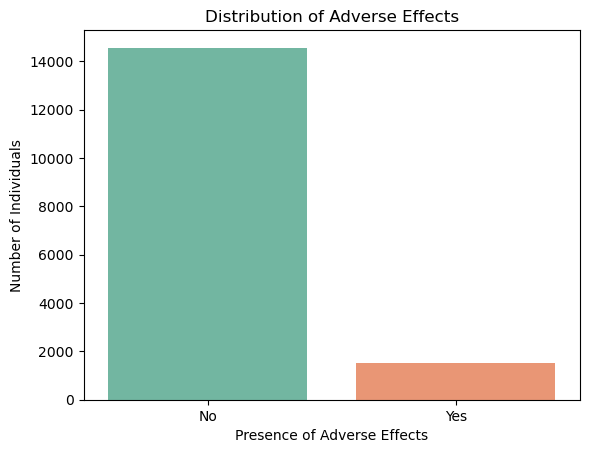

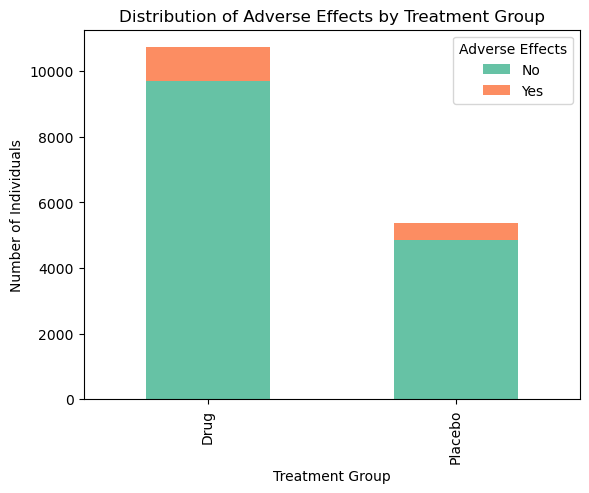

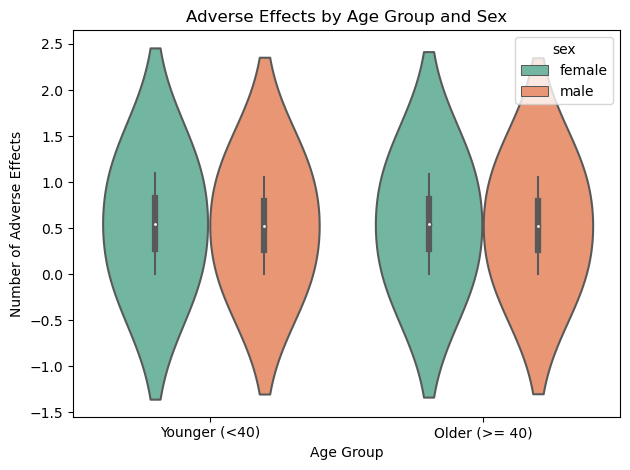

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the cleaned data is stored in the DataFrame "drug_safety"

# --- 1. Distribution of adverse effects ---

# Count the number of individuals with and without adverse effects
ae_counts = drug_safety["adverse_effects"].value_counts()

# Create the bar chart
sns.barplot(x=ae_counts.index, y=ae_counts.values)
plt.xlabel("Presence of Adverse Effects")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Adverse Effects")
plt.show()

# --- 2. Adverse effects by treatment group ---

# Count individuals with and without AEs in each group
ae_counts = drug_safety.groupby(["trx", "adverse_effects"]).size().unstack()

# Create the stacked bar chart
ae_counts.plot(kind="bar", stacked=True)
plt.xlabel("Treatment Group")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Adverse Effects by Treatment Group")
plt.legend(title="Adverse Effects")
plt.show()



# --- 3. Adverse effects by age and sex ---

# Define age groups (adjust based on your data)
age_groups = ["Younger (<40)", "Older (>= 40)"]

# Create a new column named "age_group" based on the age threshold
drug_safety["age_group"] = pd.cut(drug_safety["age"], 2, labels=age_groups)

# Group data by age group, sex, and adverse effects, and calculate mean of num_effects
ae_by_age_sex = (
    drug_safety.groupby(["age_group", "sex", "adverse_effects"])
    ["num_effects"]
    .mean()
    .reset_index()  # Reset index for grouping
)

# Create violin plots (Hue by sex differentiates plots for each sex)
sns.violinplot(
    x="age_group",
    y="num_effects",
    hue="sex",  # Differentiate by sex
    showmeans=True,  # Show mean as a diamond
    data=ae_by_age_sex,
)
plt.xlabel("Age Group")
plt.ylabel("Number of Adverse Effects")
plt.title("Adverse Effects by Age Group and Sex")
plt.tight_layout()  # Improve spacing
plt.show()


adverse_effects    No  Yes
week                      
0                1998   60
1                1807  250
2                1883  163
4                1797  233
8                1779  232
12               1776  208
16               1759  204
20               1768  186


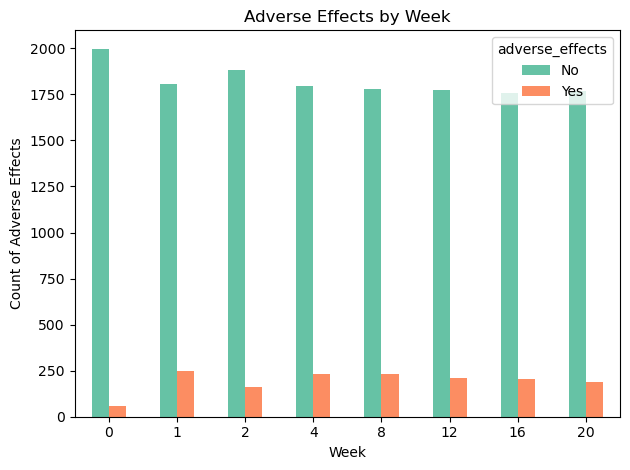

In [8]:

# Create a contingency table
contingency_table = pd.crosstab(drug_safety["week"], drug_safety["adverse_effects"])

# Visualize the contingency table
print(contingency_table)

# Create a bar chart to compare adverse effects across weeks
contingency_table.plot(kind="bar", stacked=False)
plt.xlabel("Week")
plt.ylabel("Count of Adverse Effects")
plt.title("Adverse Effects by Week")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Hypothesis Testing

We aim to investigate several key aspects related to drug safety, specifically focusing on the comparison between the "Drug" and "Placebo" groups. Let's articulate the null and alternative hypotheses for each scenario:

1. Proportion of Adverse Effects:

Null Hypothesis (H0): The proportion of adverse effects is the same between the "Drug" and "Placebo" groups.

Alternative Hypothesis (H1): The proportion of adverse effects differs significantly between the "Drug" and "Placebo" groups.


2. Independence of Number of Adverse Effects:

Null Hypothesis (H0): The number of adverse effects is independent of the treatment and control groups.

Alternative Hypothesis (H1): The number of adverse effects is not independent of the treatment and control groups, indicating a significant association between the variables.


3. Difference in Ages:

Null Hypothesis (H0): There is no significant difference in the ages of individuals in the "Drug" and "Placebo" groups.

Alternative Hypothesis (H1): There is a significant difference in the ages of individuals between the "Drug" and "Placebo" groups.

These hypotheses set the foundation for our statistical tests, guiding the interpretation of the p-values generated from the analyses. If the p-values are sufficiently low, we may reject the null hypotheses in favor of the alternative hypotheses, providing evidence for significant differences or associations in the respective aspects of interest. Conversely, higher p-values would lead to the acceptance of the null hypotheses, suggesting no significant differences or associations in the examined variables. The results obtained will contribute valuable insights into the safety and effectiveness of the drug under investigation.

The choice of the significance level (alpha) is a crucial aspect of hypothesis testing. By convention, a commonly used significance level is 0.05, corresponding to a 95% confidence level. This means that if the p-value obtained from the statistical test is less than or equal to 0.05, we reject the null hypothesis at the 5% significance level.

Two-Sample Proportions Z-Test P-value: 0.9639333330262475
Chi-square Independence Test P-value: 0.6150123339426765
Mann-Whitney U Test P-value for Age Groups: MWU    0.256963
Name: p-val, dtype: float64


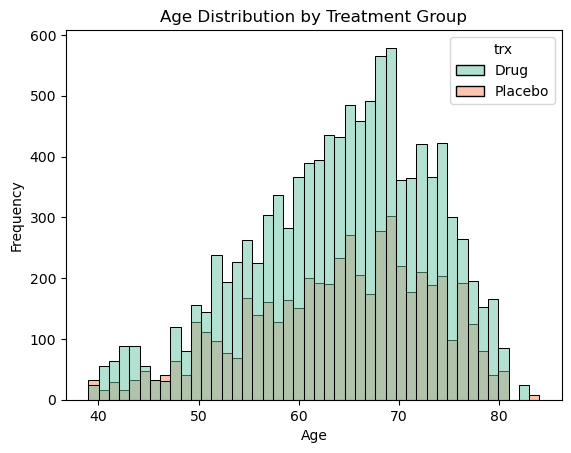

In [9]:

# Step 1: Count Adverse Effects by Treatment Group
# -------------------------------------------------
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each treatment group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Extract counts for "Yes" in each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Extract total counts for each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Step 2: Two-Sample Z-Test for Proportions
# -----------------------------------------
# Test if there's a significant difference in adverse effects between Drug and Placebo
# Interpretation: Low p-value indicates a significant difference.
two_sample_results = proportions_ztest(yeses, n)
two_sample_p_value = two_sample_results[1]
print(f"Two-Sample Proportions Z-Test P-value: {two_sample_p_value}")

# Step 3: Chi-square Independence Test
# -------------------------------------
# Investigate if the variables 'num_effects' and 'trx' are independent
# Interpretation: Low p-value suggests dependence.
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x="num_effects", y="trx")
num_effects_p_value = num_effects_groups[2]["pval"][0]
print(f"Chi-square Independence Test P-value: {num_effects_p_value}")

# Step 4: Visualization - Age Distribution by Treatment Group
# -----------------------------------------------------------
# Visualize the distribution of age in each treatment group
# Interpretation: Observe any differences in age distribution between Drug and Placebo.
sns.histplot(data=drug_safety, x="age", hue="trx")
plt.title("Age Distribution by Treatment Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
#plt.show()

# Optional: Confirm the histogram's output by conducting a normality test
normality = pingouin.normality(data=drug_safety, dv='age', group='trx', method='shapiro', alpha=0.05)

# Step 5: Mann-Whitney U Test for Age Groups
# -------------------------------------------
# Non-parametric test to compare age distributions between Drug and Placebo
# Interpretation: Low p-value indicates a significant difference in age distributions.
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]
age_group_effects = pingouin.mwu(age_trx, age_placebo)
age_group_effects_p_value = age_group_effects["p-val"]
print(f"Mann-Whitney U Test P-value for Age Groups: {age_group_effects_p_value}")


### Results and Takeaways 

**Two-Sample Proportions Z-Test for Adverse Effects:**

Null Hypothesis (H0): The proportion of adverse effects is the same between the "Drug" and "Placebo" groups.

Alternative Hypothesis (H1): The proportion of adverse effects differs significantly between the "Drug" and "Placebo" groups.

Result: The p-value for the Two-Sample Proportions Z-Test is approximately 0.964, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. There is weak evidence to suggest a significant difference in the proportion of adverse effects between the "Drug" and "Placebo" groups.

**Chi-square Independence Test for Number of Adverse Effects:**

Null Hypothesis (H0): The number of adverse effects is independent of the treatment and control groups.

Alternative Hypothesis (H1): The number of adverse effects is not independent of the treatment and control groups.

Result: The p-value for the Chi-square Independence Test is approximately 0.615, which is greater than the significance level of 0.05. We fail to reject the null hypothesis, indicating weak evidence against the independence of the number of adverse effects and the treatment groups.

**Mann-Whitney U Test for Age Groups:**

Null Hypothesis (H0): There is no significant difference in the ages of individuals in the "Drug" and "Placebo" groups.

Alternative Hypothesis (H1): There is a significant difference in the ages of individuals between the "Drug" and "Placebo" groups.

Result: The p-value for the Mann-Whitney U Test is approximately 0.257, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, suggesting weak evidence against a significant difference in the ages between the "Drug" and "Placebo" groups.

**Takeaways:**

Adverse Effects Proportions: The data does not provide enough evidence to conclude that the proportion of adverse effects differs significantly between the "Drug" and "Placebo" groups.

Independence of Adverse Effects: There is weak evidence against the independence of the number of adverse effects and the treatment groups, but the result is not statistically significant.

Age Difference: The data does not provide enough evidence to suggest a significant difference in ages between the "Drug" and "Placebo" groups.


